In [109]:
#Libs
import pandas as pd
import spotify_credential
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
#Credenciais da API
client_id = spotify_credential.SPOTIFY_CLIENT_ID
secret_client = spotify_credential.SPOTIFY_CLIENT_SECRET

#Objeto de acesso a API
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, secret_client))

user = "22vzpgcfajcfiz3zbn6exy5qa"
playlists = spotify.user_playlists(user)

In [88]:
#Keys plistisc dic object
for key in playlists:
    print(key)
print('\n')

while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%s - %s" % (playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = spotify.next(playlists)
    else:
        break

href
items
limit
next
offset
previous
total


spotify:playlist:4Ff26F5hlSBbV57FX8EhGy - API_Analysis
spotify:playlist:5vFfBhwU6gAwmxxk0vwcSj - Nostalgia


In [74]:
#chosen playlist(Usei uma playlist auxiliar onde copiei todas as musicas da playlits colaborativa)
sitio_p_mexer_420 = '4Ff26F5hlSBbV57FX8EhGy'

#get full tracklist
tracks_pt1 = spotify.user_playlist_tracks(user, sitio_p_mexer_420, limit=100, offset=0)
tracks_pt2 = spotify.user_playlist_tracks(user, sitio_p_mexer_420, limit=100, offset=100)
tracks_pt3 = spotify.user_playlist_tracks(user, sitio_p_mexer_420, limit=100, offset=200)
tracks_pt4 = spotify.user_playlist_tracks(user, sitio_p_mexer_420, limit=100, offset=300)

track_list = tracks_pt1['items'] + tracks_pt2['items'] + tracks_pt3['items'] + tracks_pt4['items']

In [89]:
#DataFrame with information from the chosen playlist
data = pd.DataFrame(track_list)
data.head()

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
1,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
2,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


In [90]:
data.columns

Index(['added_at', 'added_by', 'is_local', 'primary_color', 'track',
       'video_thumbnail'],
      dtype='object')

In [96]:
data.describe()

,added_at,added_by,is_local,primary_color,track,video_thumbnail
count,311,311,311,0,311,311
unique,1,1,1,0,311,1
top,2020-04-19T14:57:11Z,{'external_urls': {'spotify': 'https://open.sp...,False,NaN,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
freq,311,311,311,NaN,1,311


In [98]:
playlist_info = []
for k,v in enumerate(track_list):
    info = v['track']
    playlist_info.append((info['name'], info['artists'][0]['name'], info['album']['name'], info['album']['id']))

#print(playlist_info)

In [99]:
#DF playlist
playlist_df = pd.DataFrame(playlist_info, columns=('Song', 'Artist', 'Album', 'Id'))
playlist_df.head()

,Song,Artist,Album,Id
0,Não Pedi Pra Me Apaixonar,Bokaloka,De Verdade - Ao Vivo,7Kcv52NBj3hSL3J5Bwfj7w
1,Tiger Preta,Mc Lele JP,Tiger Preta,0i8jOru4gFrP4p8ExvIpy2
2,Zombie,The Cranberries,No Need To Argue,5GugLrmYMl5VRoe2zNgLGp
3,Friday I'm In Love,The Cure,Wish,0aEL0zQ4XLuxQP0j7sLlS1
4,Summer Of '69,Bryan Adams,Reckless (30th Anniversary / Deluxe Edition),2o2G49EPi4lua5zgxUKhLL


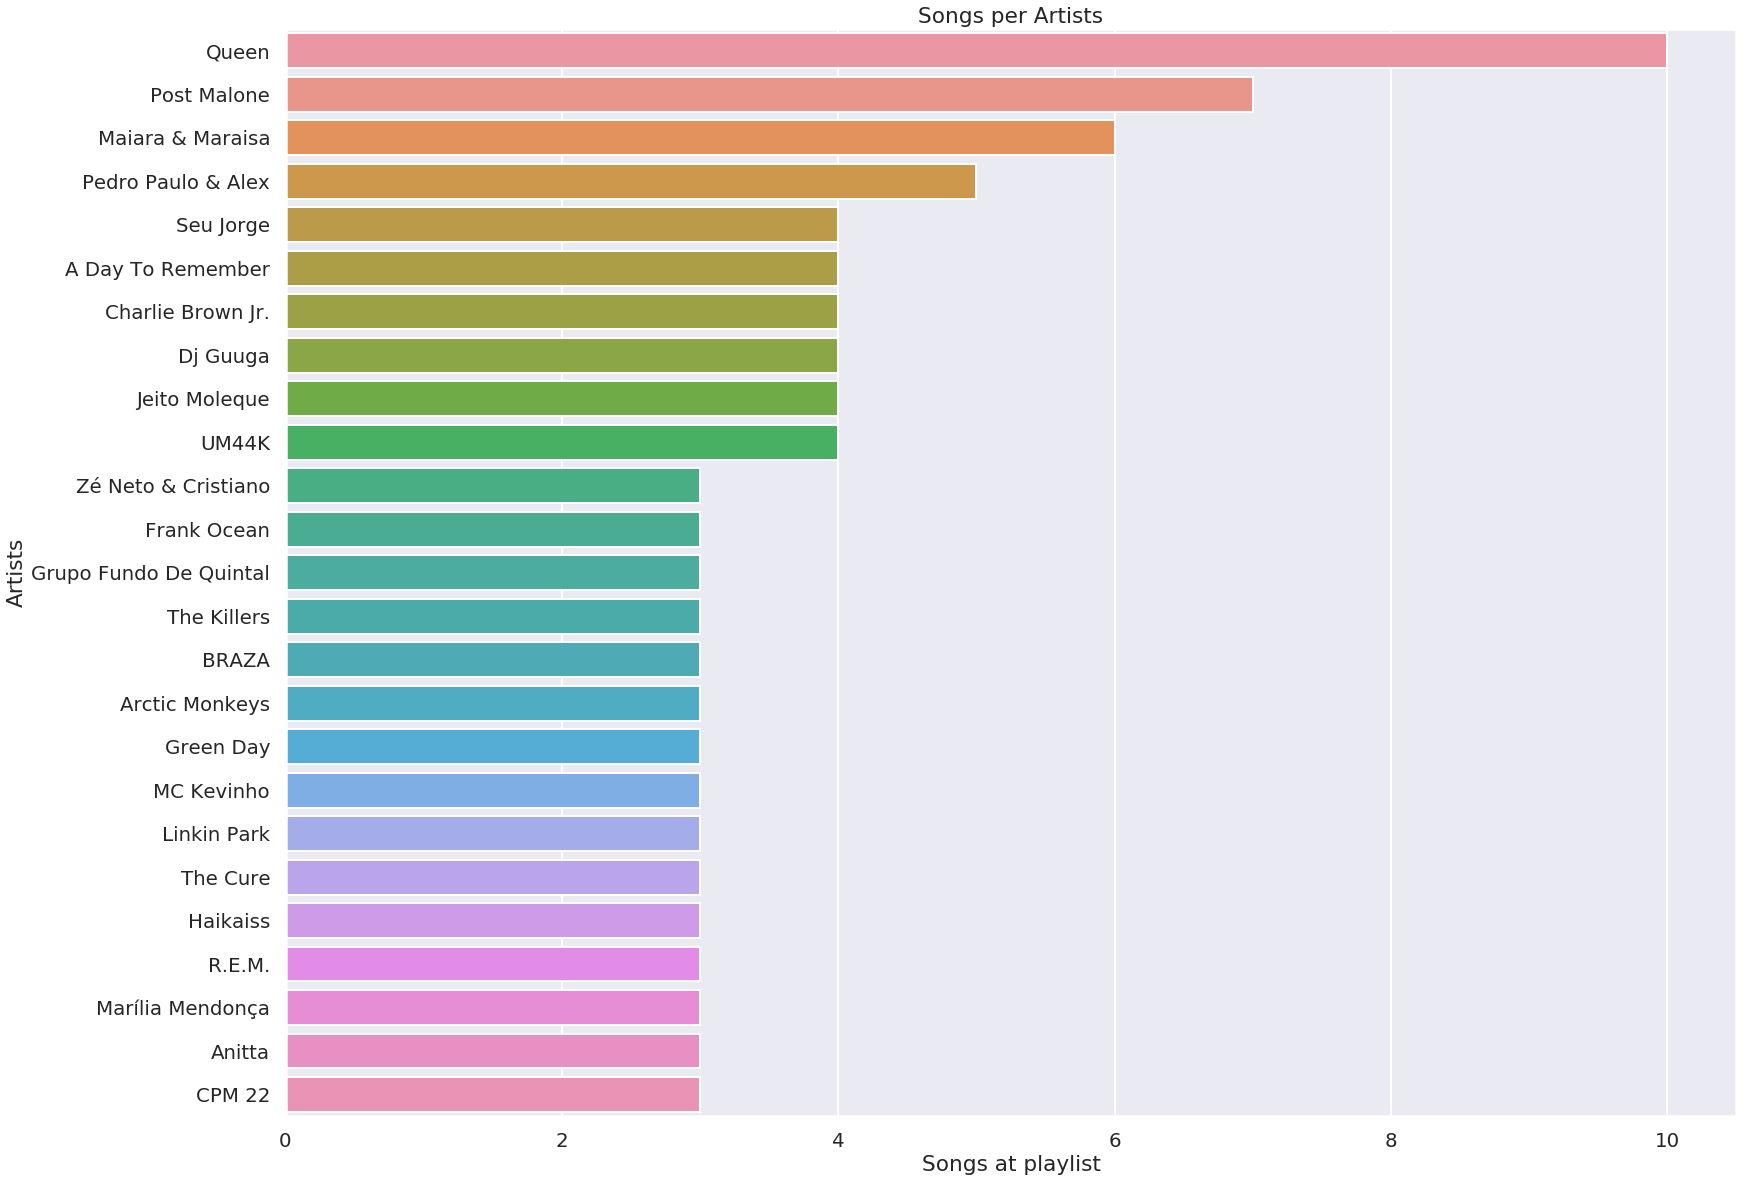

In [154]:
#Favorite Artist
sns.set_style('darkgrid')
sns.set_context("poster", font_scale=.9)

fav_artist = playlist_df['Artist'].value_counts().sort_values(ascending=False)[:25].index
ax = sns.countplot(y=playlist_df['Artist'], order=fav_artist)
plt.xlabel("Songs at playlist")
plt.ylabel("Artists")
plt.title("Songs per Artists")
sns.set(rc={'figure.figsize':(26,20)})
plt.show()

In [155]:
#audio features for each song
audio_features_name = []
audio_features_ids = []
audio_features_artists = []

#Iterating over 'tracklist' in order to create some list for future data frame
for k, v in enumerate(track_list):
    info = v['track']
    audio_features_name.append(info['name'])
    audio_features_ids.append(info['id'])
    audio_features_artists.append(info['artists'][0]['name'])

In [163]:
#get audio features for multiple tracks based upon their Spotify IDs: audio_features(tracks=[])
#tracks - a list od tracks URIs, URLs or IDs, maximum:50ids

audio_features_pt1 = []
audio_features_pt2 = []
audio_features_pt3 = []
audio_features_pt4 = []
audio_features_pt5 = []
audio_features_pt6 = []
audio_features_pt7 = []

for i in range(len(audio_features_ids)):
    if i < 50:
        audio_features_pt1.append(audio_features_ids[i])
    elif i < 100:
        audio_features_pt2.append(audio_features_ids[i])
    elif i < 150:
        audio_features_pt3.append(audio_features_ids[i])
    elif i < 200:
        audio_features_pt4.append(audio_features_ids[i])
    elif i < 250:
        audio_features_pt5.append(audio_features_ids[i])
    elif i < 300:
        audio_features_pt6.append(audio_features_ids[i])
    elif i < 400:
        audio_features_pt7.append(audio_features_ids[i])
        
audio_features1 = spotify.audio_features(audio_features_pt1)
audio_features2 = spotify.audio_features(audio_features_pt2)
audio_features3 = spotify.audio_features(audio_features_pt3)
audio_features4 = spotify.audio_features(audio_features_pt4)
audio_features5 = spotify.audio_features(audio_features_pt5)
audio_features6 = spotify.audio_features(audio_features_pt6)
audio_features7 = spotify.audio_features(audio_features_pt7)

audio_features = audio_features1 + audio_features2 + audio_features3 + \
                    audio_features4 + audio_features5 + audio_features6 + \
                        audio_features7

In [173]:
#Creating audio features DF
audio_features_df = pd.DataFrame(audio_features)

#Insert colums
audio_features_df.insert(0, "tracks", audio_features_name, True)
audio_features_df.insert(1, "artist", audio_features_artists, True)

audio_features_df.head(10)

,tracks,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Não Pedi Pra Me Apaixonar,Bokaloka,0.429,0.657,6,-9.155,0,0.1210,0.518000,0.000000,0.9370,0.493,87.189,audio_features,0zvQ9pOQUeWYYp6uy7uvX7,spotify:track:0zvQ9pOQUeWYYp6uy7uvX7,https://api.spotify.com/v1/tracks/0zvQ9pOQUeWY...,https://api.spotify.com/v1/audio-analysis/0zvQ...,231467,4
1,Tiger Preta,Mc Lele JP,0.931,0.568,5,-2.600,0,0.2520,0.479000,0.000000,0.0759,0.862,131.913,audio_features,4FH2oGJM4RcCKNoKDtHTQb,spotify:track:4FH2oGJM4RcCKNoKDtHTQb,https://api.spotify.com/v1/tracks/4FH2oGJM4RcC...,https://api.spotify.com/v1/audio-analysis/4FH2...,207273,4
2,Zombie,The Cranberries,0.307,0.635,7,-8.957,1,0.0339,0.015500,0.004860,0.3660,0.305,166.978,audio_features,2IZZqH4K02UIYg5EohpNHF,spotify:track:2IZZqH4K02UIYg5EohpNHF,https://api.spotify.com/v1/tracks/2IZZqH4K02UI...,https://api.spotify.com/v1/audio-analysis/2IZZ...,306427,4
3,Friday I'm In Love,The Cure,0.526,0.763,0,-12.663,0,0.0341,0.001260,0.000068,0.3590,0.514,136.205,audio_features,4QlzkaRHtU8gAdwqjWmO8n,spotify:track:4QlzkaRHtU8gAdwqjWmO8n,https://api.spotify.com/v1/tracks/4QlzkaRHtU8g...,https://api.spotify.com/v1/audio-analysis/4Qlz...,215160,4
4,Summer Of '69,Bryan Adams,0.508,0.834,2,-6.205,1,0.0386,0.018300,0.000000,0.0732,0.774,139.131,audio_features,0GONea6G2XdnHWjNZd6zt3,spotify:track:0GONea6G2XdnHWjNZd6zt3,https://api.spotify.com/v1/tracks/0GONea6G2Xdn...,https://api.spotify.com/v1/audio-analysis/0GON...,216053,4
5,Vidrado Em Você,Dj Guuga,0.843,0.925,2,0.302,1,0.0997,0.139000,0.000008,0.1090,0.590,159.926,audio_features,2kOmW169C7UV4SZDN9u0YO,spotify:track:2kOmW169C7UV4SZDN9u0YO,https://api.spotify.com/v1/tracks/2kOmW169C7UV...,https://api.spotify.com/v1/audio-analysis/2kOm...,134769,4
6,Basket Case,Green Day,0.442,0.943,3,-3.205,1,0.0602,0.002930,0.000009,0.0910,0.781,85.064,audio_features,6L89mwZXSOwYl76YXfX13s,spotify:track:6L89mwZXSOwYl76YXfX13s,https://api.spotify.com/v1/tracks/6L89mwZXSOwY...,https://api.spotify.com/v1/audio-analysis/6L89...,181533,4
7,Self Esteem,The Offspring,0.458,0.912,5,-3.666,1,0.0618,0.017500,0.000000,0.3630,0.611,104.526,audio_features,6EsBn1Md8C5YdbCzvwvZq8,spotify:track:6EsBn1Md8C5YdbCzvwvZq8,https://api.spotify.com/v1/tracks/6EsBn1Md8C5Y...,https://api.spotify.com/v1/audio-analysis/6EsB...,257760,4
8,Savior,Rise Against,0.554,0.932,5,-3.424,0,0.0485,0.001540,0.000142,0.4250,0.478,112.490,audio_features,1vcxF91pWs9uNwDROuiCPB,spotify:track:1vcxF91pWs9uNwDROuiCPB,https://api.spotify.com/v1/tracks/1vcxF91pWs9u...,https://api.spotify.com/v1/audio-analysis/1vcx...,242280,4
9,Ray,Millencolin,0.308,0.978,11,-2.617,1,0.1340,0.000363,0.000000,0.3490,0.349,196.503,audio_features,2WbxknLnzzrg2C1l3tivqc,spotify:track:2WbxknLnzzrg2C1l3tivqc,https://api.spotify.com/v1/tracks/2WbxknLnzzrg...,https://api.spotify.com/v1/audio-analysis/2Wbx...,176453,4


__Features:__
* __Danceability__ - O quanto a musica é "boa para dançar" leva em conta uma combinação de elementos musicas como ritmo, estabilidade de ritmo, força de batida e regularidade geral. Varia de 0,0 a 1,0
* __Energy__ - Mede o percentual de intensidade e atividade, tipicamente a faixa é rapida, alta, barulhenta, etc... Varia de 0.0 a 1.0
* __Key__ - Inteiro usado para atribuir uma notação padrão para a afinação
* __Loudness__ - Mede os decibeis(db) da musica. Tipicamento variam entre -60 e 0
* __Mode__ - Indica o tipo de melodia(maior ou menor) ao qual seu conteúdo é derivado. Maior = 1 e Menor = 0
* __Speechiness__ - Detecta a presença de palavras faladas na faixa. 
    * Valor < 0.66 --> Descreve faixas que provavelmente são inteiramente palavras faladas
    * 0.33 < Valor < 0.66 -->  Provavelmente contém musica e discurso, incluindo RAP
    * Valor < 0.33 --> Provavelmente representa musica e faixas sem falas alguma.
 
* __Acousticness__ - Medida da confiança de quando a faixa é ou não acustica. Varia de 0.0(baixa confiança) a 1.0(alta confiança)
* __Instrumentalness__ - Preve quando a faixa nao tem _vocal_. "Ooh" e "aah" são tratados como instrumentais neste contexto. Varia de 0.0 a 1.0
* __Liveness__ - Detecta a presença da _audiencia_ na faixa, no caso de musicas _in live_. Altos valors de liveness representam alta probabilidade da faixa ser _live_. Valores acima de 0.8 representam um intervalo de confiança forte.
* __Valence__ - Varia de 0.0 a 1.0 e mede a _positividade_ da musica. Valores altos de _valence_ indicam que a musica é mais postiva(feliz, alegre, ...), enquanto valores baixos indicam negatividade
* __Tempo__ - Estimativa do tempo da musica em batidas por minuto (BPM)
* __Duration_ms__ - Duração da faixa em milesegundos
* __Time_Signature__ - É uma Convenção que especifica quantas batidas existem em cada barra

In [174]:
audio_features_df.iloc[:,:].corr().style.background_gradient(cmap='Reds')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1,-0.260556,0.110656,0.0999763,-0.151577,0.2721,0.253412,-0.0356672,-0.1656,0.391473,-0.116564,-0.27633,0.11291
energy,-0.260556,1,0.0822416,0.579859,0.0131022,-0.0726127,-0.343182,0.0213681,0.260784,0.16529,0.093499,-0.122322,0.0791889
key,0.110656,0.0822416,1,0.0998456,-0.0906418,0.156463,0.0528306,-0.0260854,0.0069611,0.0598348,-0.0569695,-0.027852,-0.0851995
loudness,0.0999763,0.579859,0.0998456,1,0.0675367,0.13461,-0.203108,-0.0572409,0.0962332,0.120206,0.0681777,-0.262865,0.107577
mode,-0.151577,0.0131022,-0.0906418,0.0675367,1,-0.0891947,0.0218789,0.0739706,0.172987,-0.122996,-0.0553976,0.0928632,-0.0652688
speechiness,0.2721,-0.0726127,0.156463,0.13461,-0.0891947,1,0.096863,-0.01834,0.0138353,0.0866301,0.0526212,-0.192045,0.165854
acousticness,0.253412,-0.343182,0.0528306,-0.203108,0.0218789,0.096863,1,-0.033249,0.137728,0.198005,-0.0840482,-0.150226,-0.052121
instrumentalness,-0.0356672,0.0213681,-0.0260854,-0.0572409,0.0739706,-0.01834,-0.033249,1,-0.0793455,-0.0553907,-0.0506692,0.0541874,-0.00132248
liveness,-0.1656,0.260784,0.0069611,0.0962332,0.172987,0.0138353,0.137728,-0.0793455,1,0.00907909,-0.0218603,-0.119654,0.0436419
valence,0.391473,0.16529,0.0598348,0.120206,-0.122996,0.0866301,0.198005,-0.0553907,0.00907909,1,-0.0222747,-0.296911,0.0504708


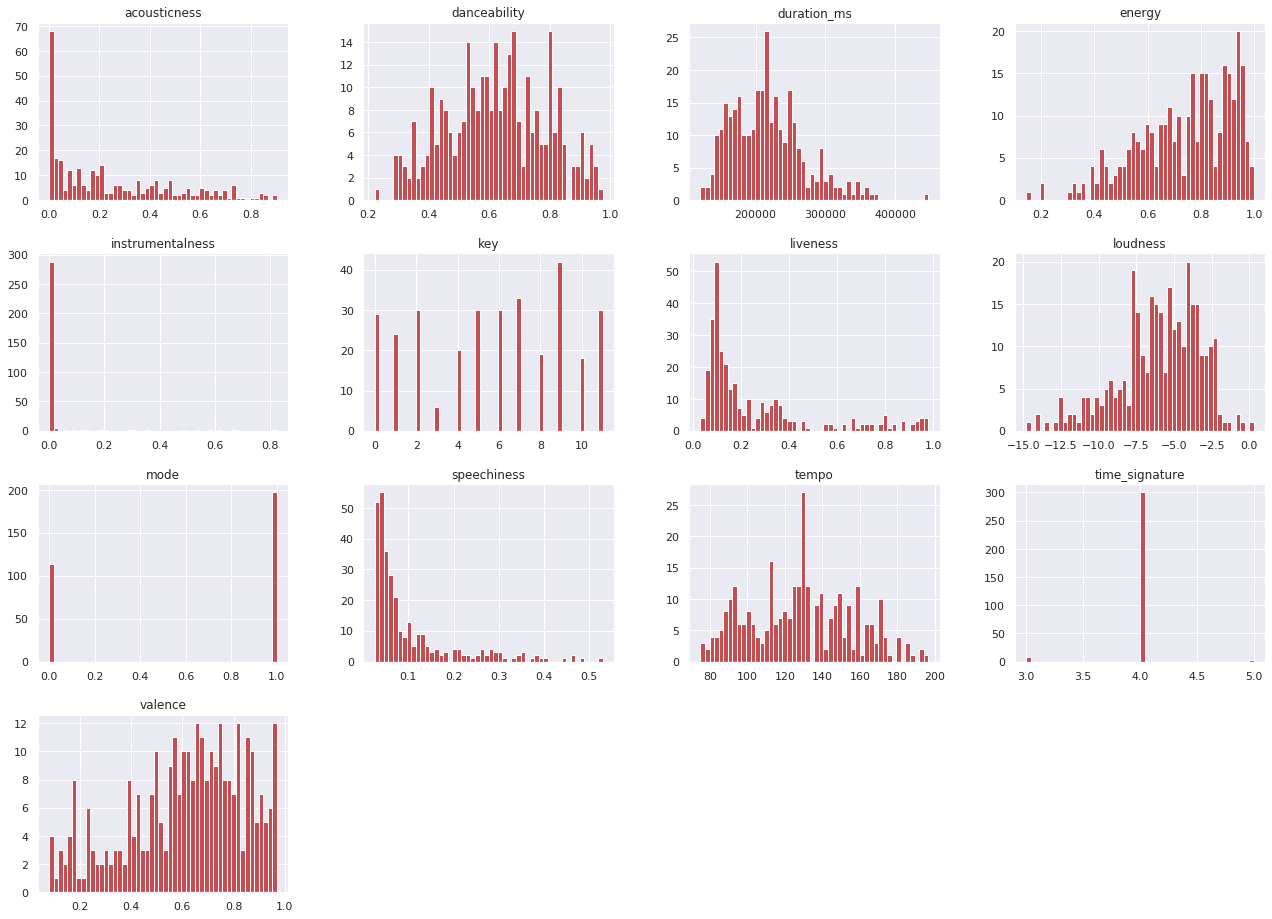

In [176]:
audio_features_df.hist(bins=50, figsize=(22,16), color='r')
plt.show()

In [181]:
#Chosen features
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']

audio_features_df.loc[:, features].mean()

danceability        0.621225
energy              0.739444
speechiness         0.102125
acousticness        0.246837
instrumentalness    0.019828
valence             0.615718
dtype: float64

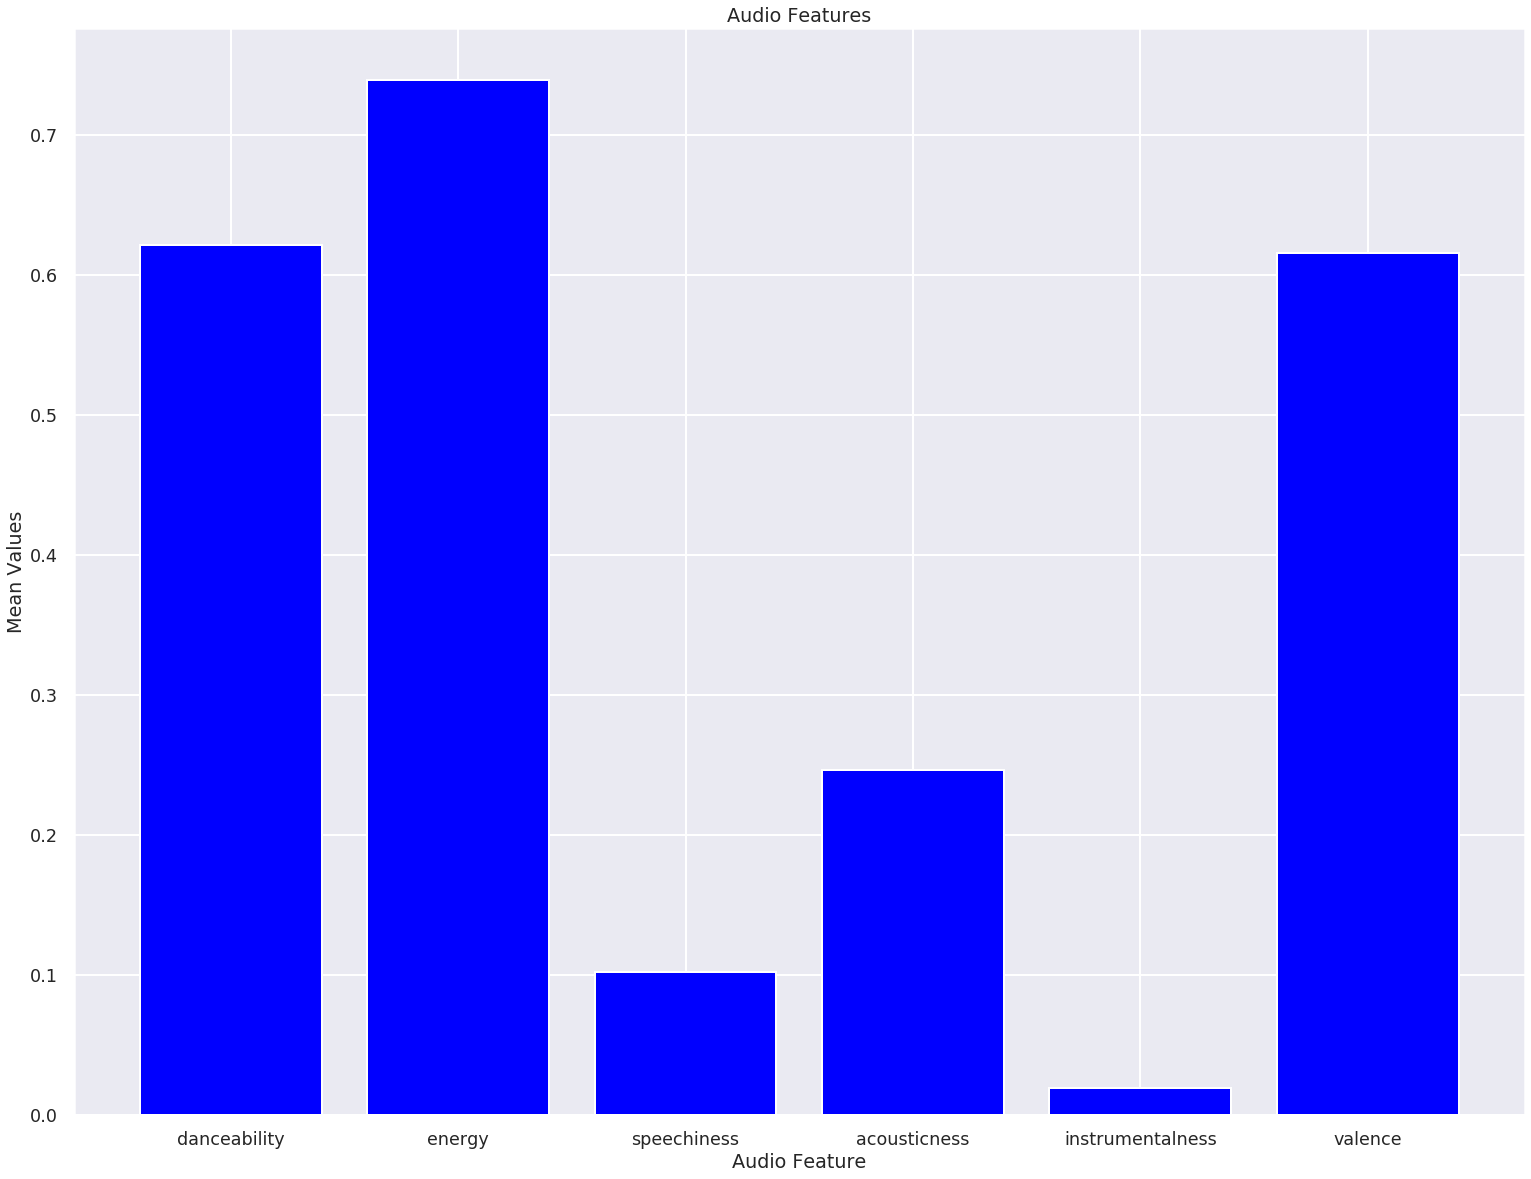

In [201]:
ax = plt.bar(audio_features_df.loc[:, features].mean().keys(), audio_features_df.loc[:, features].mean(), 
            color='blue')
sns.set_context("poster", font_scale=0.8)
plt.xlabel("Audio Feature")
plt.ylabel("Mean Values")
plt.title("Audio Features")
plt.show()

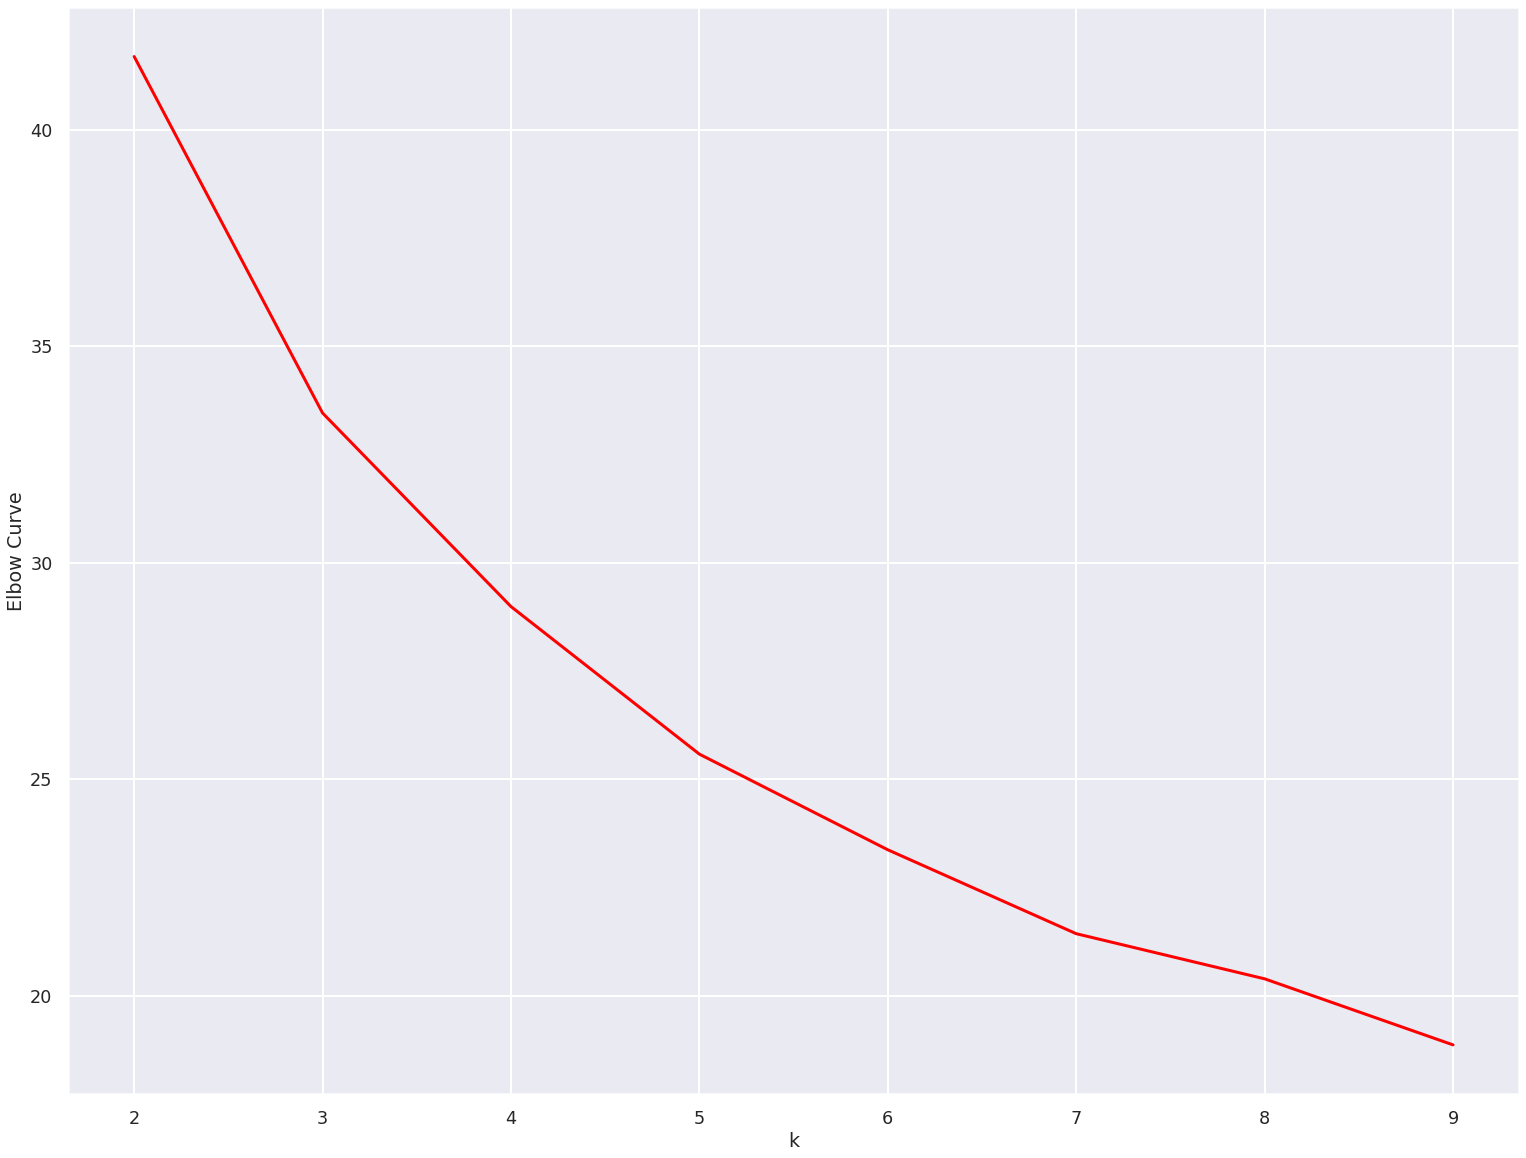

In [205]:
#Clustering Songs
from sklearn.cluster import KMeans

#Determinando o melhor "k"
X = audio_features_df[features]
distorsions = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    #.inertia_ é a Soma das distancias ao quadrado das amostras ao centróide mais proximo
    distorsions.append(model.inertia_)
    
plt.plot(range(2,10), distorsions, color='red')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Elbow Curve')
plt.show()

___Podemos afirmar, com rasoável confiança, que a lineariade da queda começa a ocorrer para k =4___

In [208]:
#Training data
X = audio_features_df[features]
model = KMeans(n_clusters=4)
model.fit(X)

#Predicti
y = model.predict(X)
y

array([0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3,
       0, 0, 0, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 1, 3, 3, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2,
       3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 2, 1, 1, 3, 2,
       3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 3, 1, 1, 1, 1, 3, 3,
       3, 3, 0, 3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2,
       0, 3, 1, 3, 3, 2, 0, 3, 1, 2, 0, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       2, 0, 0, 2, 1, 2, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 3,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       3, 2, 1, 1, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3, 2, 2, 2, 3, 3, 1,
       1, 1, 1, 1, 0, 3, 1, 0, 1, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1,
       1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 1, 3, 0, 2, 1, 3, 3, 2, 1, 0, 3,
       0, 1, 1, 0, 0, 1, 1, 3, 1, 1, 2, 0, 3, 2, 3,

In [210]:
#Centroides
centers = model.cluster_centers_
centers

array([[0.55426923, 0.44326923, 0.09433462, 0.62961538, 0.02598577,
        0.39973077],
       [0.48234177, 0.80446835, 0.07262658, 0.05039931, 0.0258198 ,
        0.3663443 ],
       [0.69816   , 0.76306667, 0.115088  , 0.52492   , 0.01115229,
        0.7542    ],
       [0.67422137, 0.74548855, 0.11403893, 0.13012138, 0.01995911,
        0.72968702]])

Como estamos trabalhando com 6 features a visualização desses 6 clusters nao seria possível, portanto usaremos _Redução de Dimensionalidade_ para que a visualização seja possível em 2d.

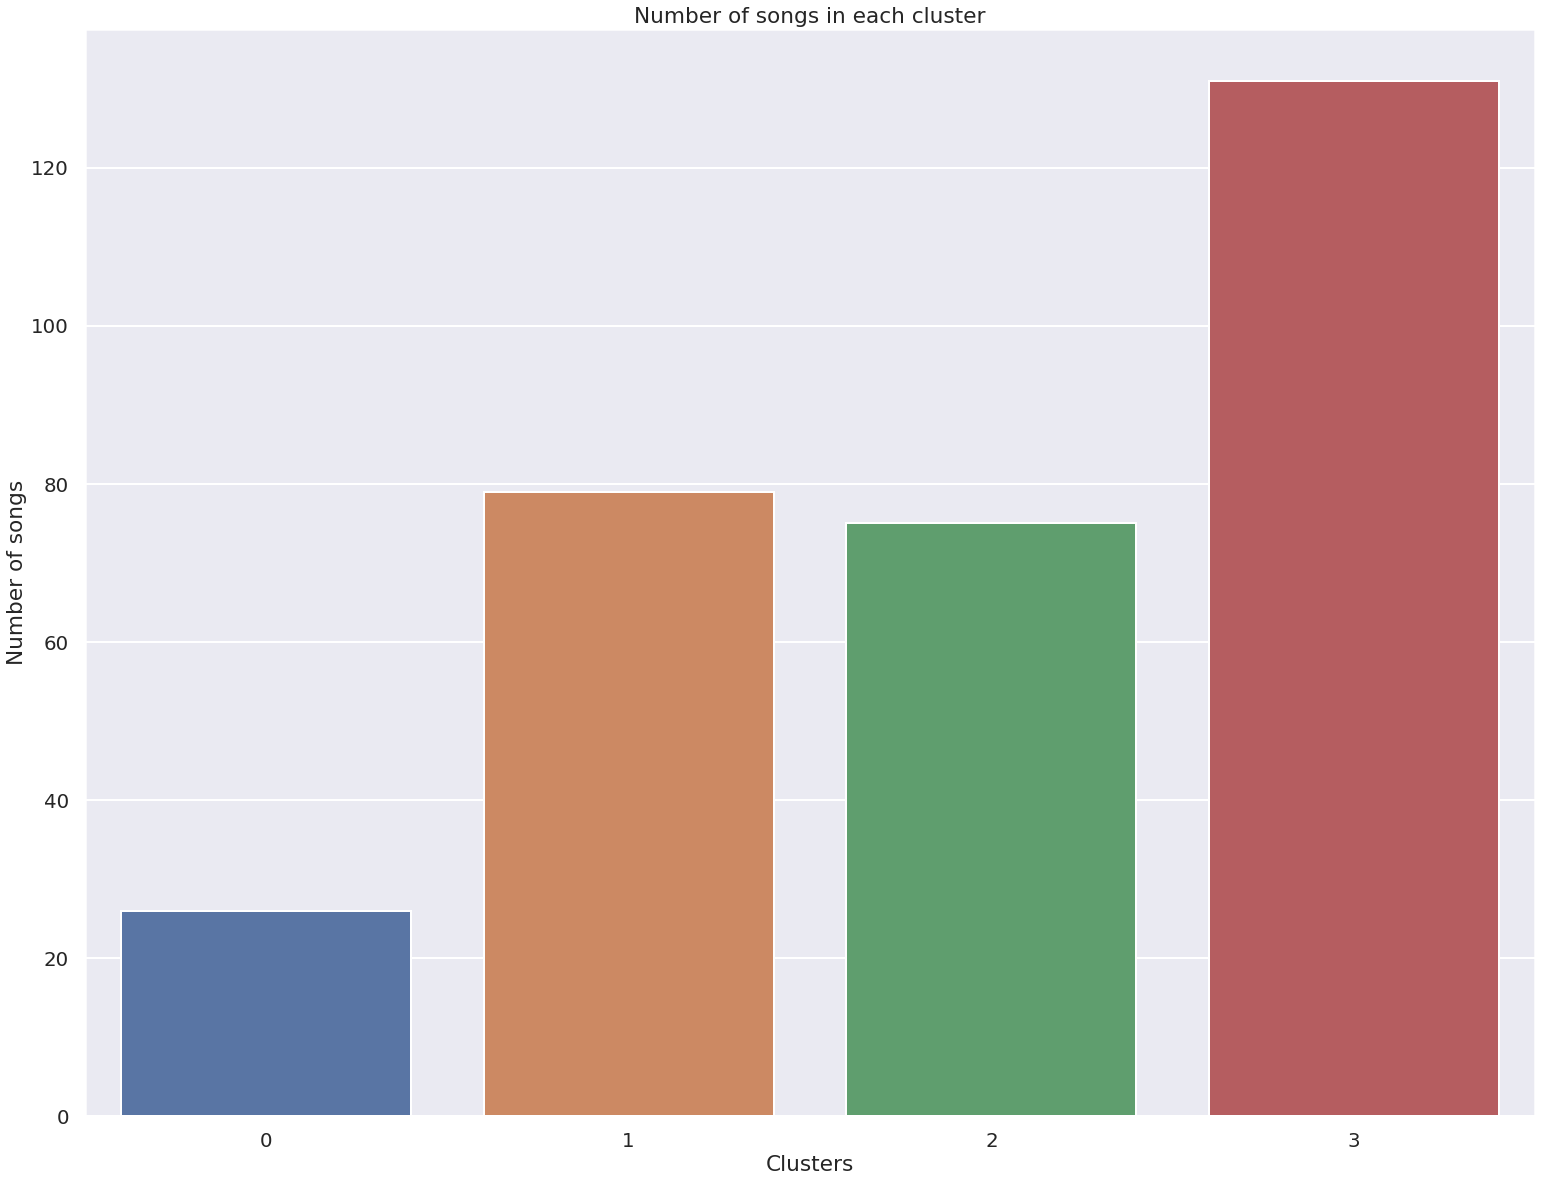

In [222]:
#Musicas por clusters
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster')
plt.show()

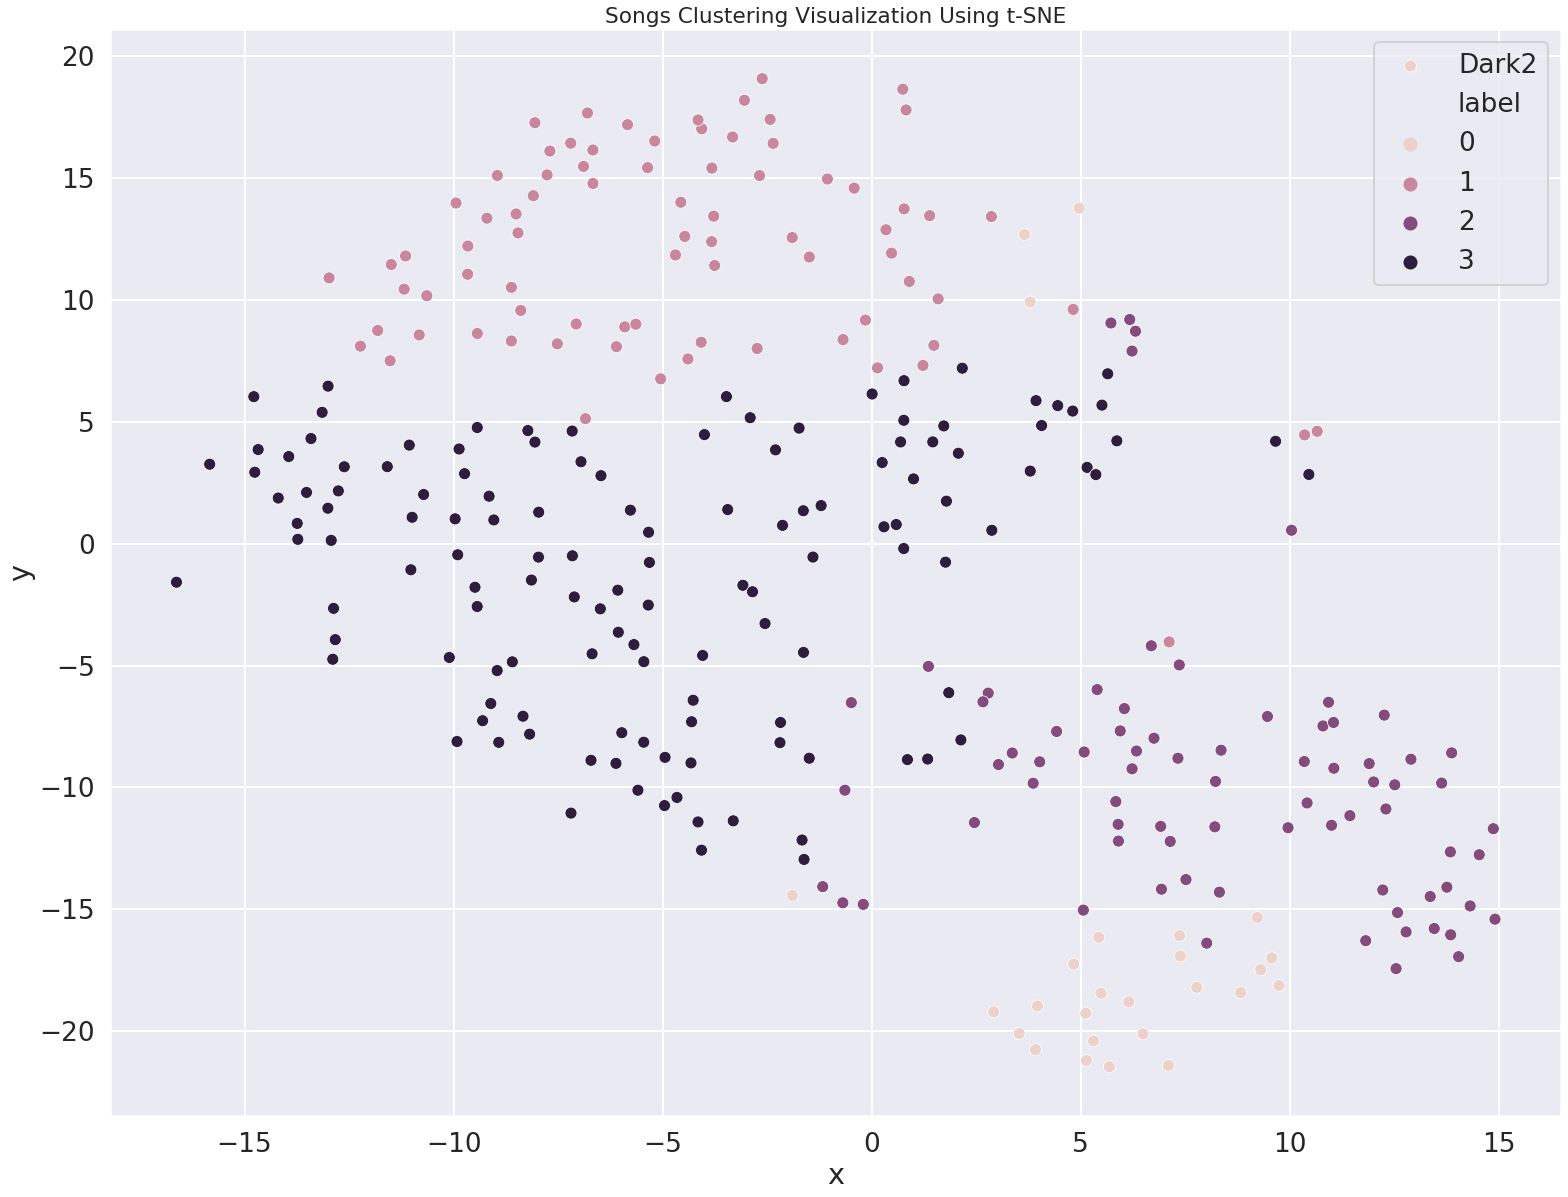

In [217]:
#T-SNE procura preservar pequenas distâncias aos pares
from sklearn.manifold import TSNE

#Aplicando o TSNE
tsne_obj = TSNE()
tsne = tsne_obj.fit_transform(X)

#DF com o resultado da redução de dimensionalidade feita pela t-SNE
tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])
tsne_df['label'] = y

#Visualização com cada grupo tendo sua label dada pelo predict(y)
sns.scatterplot(data=tsne_df, x='x', y='y', hue='label',label='Dark2')
sns.set_context("poster", font_scale=0.9)
plt.title("Songs Clustering Visualization Using t-SNE")
plt.show()

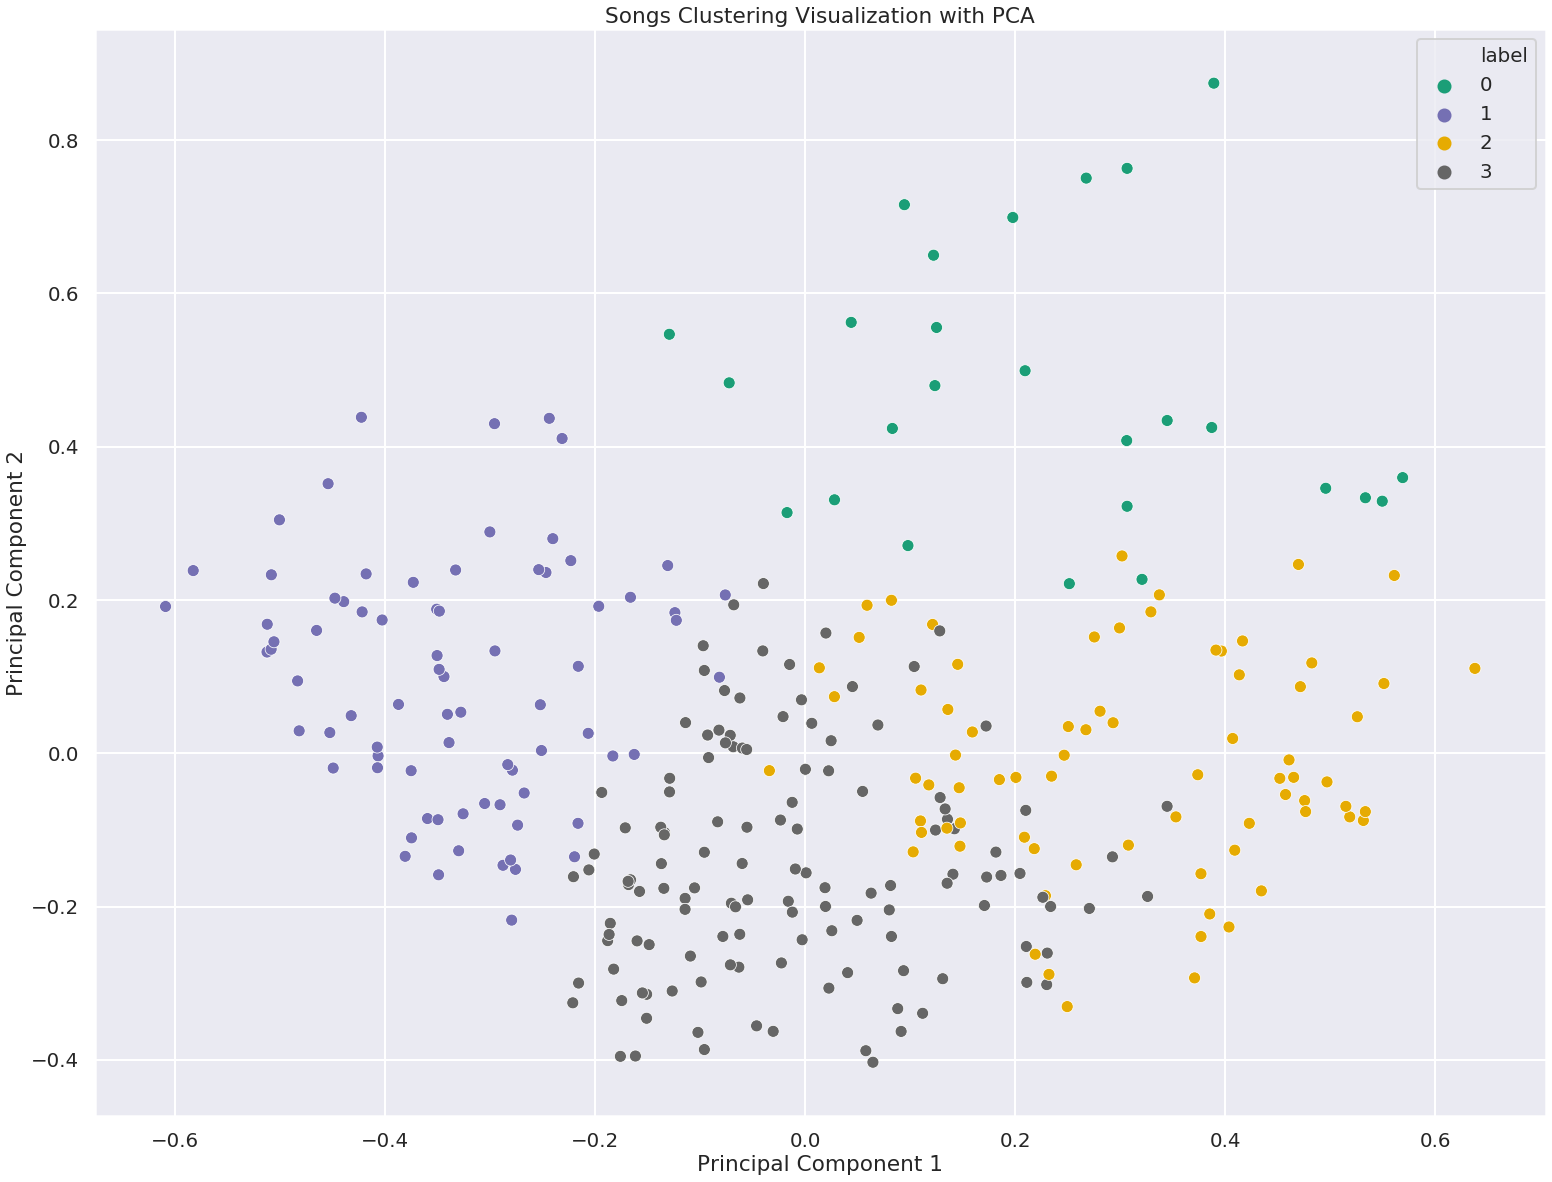

In [221]:
#PCA procura preservar grandes distancias entre pares
from sklearn.decomposition import PCA

#Aplicando o PCA
pca = PCA(n_components=2) #2 dimensões
pc = pca.fit_transform(X)

#DF com o resultado da redução de dimensionalidade feita pela t-SNE
pca_df = pd.DataFrame(pc, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['label'] = y

#visualização
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='label', palette='Dark2')
sns.set_context("poster", font_scale=0.9)
plt.title("Songs Clustering Visualization with PCA")
plt.show()

In [223]:
#Incluindo a label dos clusters no DF
audio_features_df.loc[:, 'label'] = y
audio_features_df.head(10)

,tracks,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label
0,Não Pedi Pra Me Apaixonar,Bokaloka,0.429,0.657,6,-9.155,0,0.1210,0.518000,0.000000,...,0.493,87.189,audio_features,0zvQ9pOQUeWYYp6uy7uvX7,spotify:track:0zvQ9pOQUeWYYp6uy7uvX7,https://api.spotify.com/v1/tracks/0zvQ9pOQUeWY...,https://api.spotify.com/v1/audio-analysis/0zvQ...,231467,4,0
1,Tiger Preta,Mc Lele JP,0.931,0.568,5,-2.600,0,0.2520,0.479000,0.000000,...,0.862,131.913,audio_features,4FH2oGJM4RcCKNoKDtHTQb,spotify:track:4FH2oGJM4RcCKNoKDtHTQb,https://api.spotify.com/v1/tracks/4FH2oGJM4RcC...,https://api.spotify.com/v1/audio-analysis/4FH2...,207273,4,2
2,Zombie,The Cranberries,0.307,0.635,7,-8.957,1,0.0339,0.015500,0.004860,...,0.305,166.978,audio_features,2IZZqH4K02UIYg5EohpNHF,spotify:track:2IZZqH4K02UIYg5EohpNHF,https://api.spotify.com/v1/tracks/2IZZqH4K02UI...,https://api.spotify.com/v1/audio-analysis/2IZZ...,306427,4,1
3,Friday I'm In Love,The Cure,0.526,0.763,0,-12.663,0,0.0341,0.001260,0.000068,...,0.514,136.205,audio_features,4QlzkaRHtU8gAdwqjWmO8n,spotify:track:4QlzkaRHtU8gAdwqjWmO8n,https://api.spotify.com/v1/tracks/4QlzkaRHtU8g...,https://api.spotify.com/v1/audio-analysis/4Qlz...,215160,4,1
4,Summer Of '69,Bryan Adams,0.508,0.834,2,-6.205,1,0.0386,0.018300,0.000000,...,0.774,139.131,audio_features,0GONea6G2XdnHWjNZd6zt3,spotify:track:0GONea6G2XdnHWjNZd6zt3,https://api.spotify.com/v1/tracks/0GONea6G2Xdn...,https://api.spotify.com/v1/audio-analysis/0GON...,216053,4,3
5,Vidrado Em Você,Dj Guuga,0.843,0.925,2,0.302,1,0.0997,0.139000,0.000008,...,0.590,159.926,audio_features,2kOmW169C7UV4SZDN9u0YO,spotify:track:2kOmW169C7UV4SZDN9u0YO,https://api.spotify.com/v1/tracks/2kOmW169C7UV...,https://api.spotify.com/v1/audio-analysis/2kOm...,134769,4,3
6,Basket Case,Green Day,0.442,0.943,3,-3.205,1,0.0602,0.002930,0.000009,...,0.781,85.064,audio_features,6L89mwZXSOwYl76YXfX13s,spotify:track:6L89mwZXSOwYl76YXfX13s,https://api.spotify.com/v1/tracks/6L89mwZXSOwY...,https://api.spotify.com/v1/audio-analysis/6L89...,181533,4,3
7,Self Esteem,The Offspring,0.458,0.912,5,-3.666,1,0.0618,0.017500,0.000000,...,0.611,104.526,audio_features,6EsBn1Md8C5YdbCzvwvZq8,spotify:track:6EsBn1Md8C5YdbCzvwvZq8,https://api.spotify.com/v1/tracks/6EsBn1Md8C5Y...,https://api.spotify.com/v1/audio-analysis/6EsB...,257760,4,1
8,Savior,Rise Against,0.554,0.932,5,-3.424,0,0.0485,0.001540,0.000142,...,0.478,112.490,audio_features,1vcxF91pWs9uNwDROuiCPB,spotify:track:1vcxF91pWs9uNwDROuiCPB,https://api.spotify.com/v1/tracks/1vcxF91pWs9u...,https://api.spotify.com/v1/audio-analysis/1vcx...,242280,4,1
9,Ray,Millencolin,0.308,0.978,11,-2.617,1,0.1340,0.000363,0.000000,...,0.349,196.503,audio_features,2WbxknLnzzrg2C1l3tivqc,spotify:track:2WbxknLnzzrg2C1l3tivqc,https://api.spotify.com/v1/tracks/2WbxknLnzzrg...,https://api.spotify.com/v1/audio-analysis/2Wbx...,176453,4,1


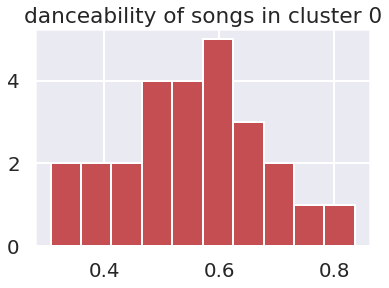

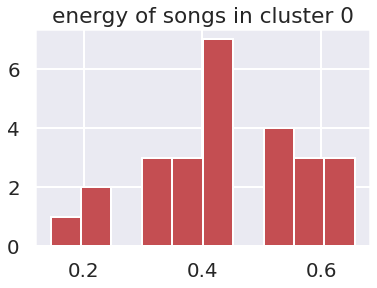

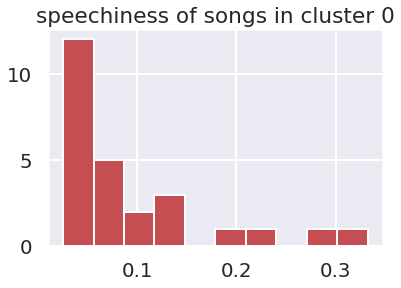

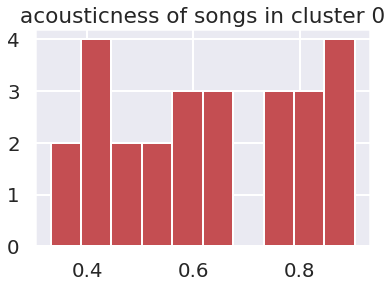

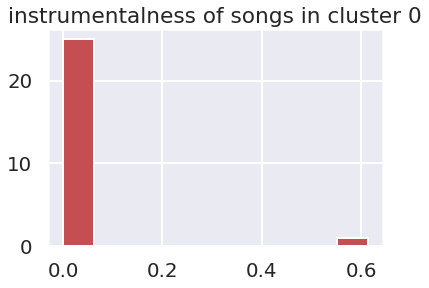

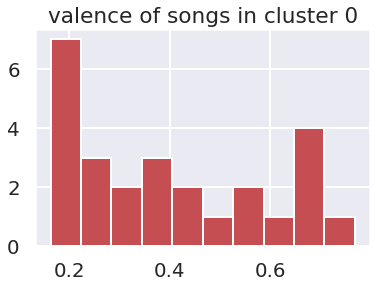

In [255]:
#Distribuição das musicas, por feature, em cada cluster
#Predominancia de estilo musical em cada cluster

l0 = []
l1 = []
l2 = []
l3 = []
for k,v in enumerate(audio_features_df['tracks']):
    if y[k] == 0:
        l0.append(v)
    elif y[k] == 1:
        l1.append(v)
    elif y[k] == 2:
        l2.append(v)
    else:
        l3.append(v)
        
#cluster 0
#print(l0)

for feature in features:
    plt.subplot(audio_features_df.loc[:,feature][audio_features_df['label'] == 0].hist(color='r', figsize=(6,4)))
    plt.title("%s of songs in cluster 0" % feature)
    plt.show()

In [258]:
#Médias de cada cluster
mean_cluster0 = audio_features_df.loc[:,features][audio_features_df['label'] == 0].mean()
mean_cluster1 = audio_features_df.loc[:,features][audio_features_df['label'] == 1].mean()
mean_cluster2 = audio_features_df.loc[:,features][audio_features_df['label'] == 2].mean()
mean_cluster3 = audio_features_df.loc[:,features][audio_features_df['label'] == 3].mean()

In [260]:
#DF medias
mean_df = pd.DataFrame(mean_cluster0, columns=["Cluster 0"])
mean_df['Cluster 1'] = mean_cluster1
mean_df['Cluster 2'] = mean_cluster2
mean_df['Cluster 3'] = mean_cluster3
mean_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
danceability,0.554269,0.482342,0.698160,0.674221
energy,0.443269,0.804468,0.763067,0.745489
speechiness,0.094335,0.072627,0.115088,0.114039
acousticness,0.629615,0.050399,0.524920,0.130121
instrumentalness,0.025986,0.025820,0.011152,0.019959
valence,0.399731,0.366344,0.754200,0.729687


___Com os dados agrupados e rotulados podemos utilizar tecnicas para fazer previsões sobre os rótulos de cada musica___

Primeiramente devemos equilibrar o numero de musicas em cada cluster, de modo aleatório, para reduzir o viés do DF.

In [274]:
#Usando SMOTE para o balanceamento
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

balancing = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
columns = X_train.columns

In [275]:
balancing_X, balancing_y = balancing.fit_sample(X_train, y_train)
balancing_X = pd.DataFrame(data=balancing_X, columns=columns)
balancing_y = pd.DataFrame(data=balancing_y, columns=['label'])

In [276]:
#Modelos testados
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [293]:
#Models
model1 = SVC(kernel='linear')
model2 = RandomForestClassifier(n_estimators=100)
model3 = SVC(gamma='auto') #non-linear kernel
model4 = KNeighborsClassifier()

print('Accuracy od SVC (linear kernel): {:.2f}%'.format(cross_val_score(estimator=model1, X=balancing_X, 
                                                                       y=balancing_y.values.ravel(), 
                                                                        cv=5).mean()*100))

print('Accuracy of RandomForestClassifier: {:.2f}%'.format(cross_val_score(estimator=model2, X=balancing_X,
                                                            y=balancing_y.values.ravel(), cv=5).mean()*100))

print('Accuracy of SVC: {:.2f}%'.format(cross_val_score(estimator=model3, X=balancing_X, 
                                        y=balancing_y.values.ravel(), cv=5).mean()*100))

print('Accuracy of KNeighborsClassifier: {:.2f}%'.format(cross_val_score(estimator=model4, X=balancing_X,
                                                         y=balancing_y.values.ravel(), cv=5).mean()*100))

Accuracy od SVC (linear kernel): 98.27%
Accuracy of RandomForestClassifier: 97.06%
Accuracy of SVC: 97.70%
Accuracy of KNeighborsClassifier: 95.36%


__Vemos que SVC possui o melhor desempenho__

In [294]:
#Treinando com o melhor modelo
model = SVC(gamma='auto')
model.fit(balancing_X, balancing_y.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [302]:
#Previsão
y_pred_test = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df = results_df.tail(25)
df

,Actual,Predicted
69,2,2
70,1,1
71,3,3
72,2,2
73,3,3
74,3,3
75,1,1
76,3,3
77,2,0
78,2,2


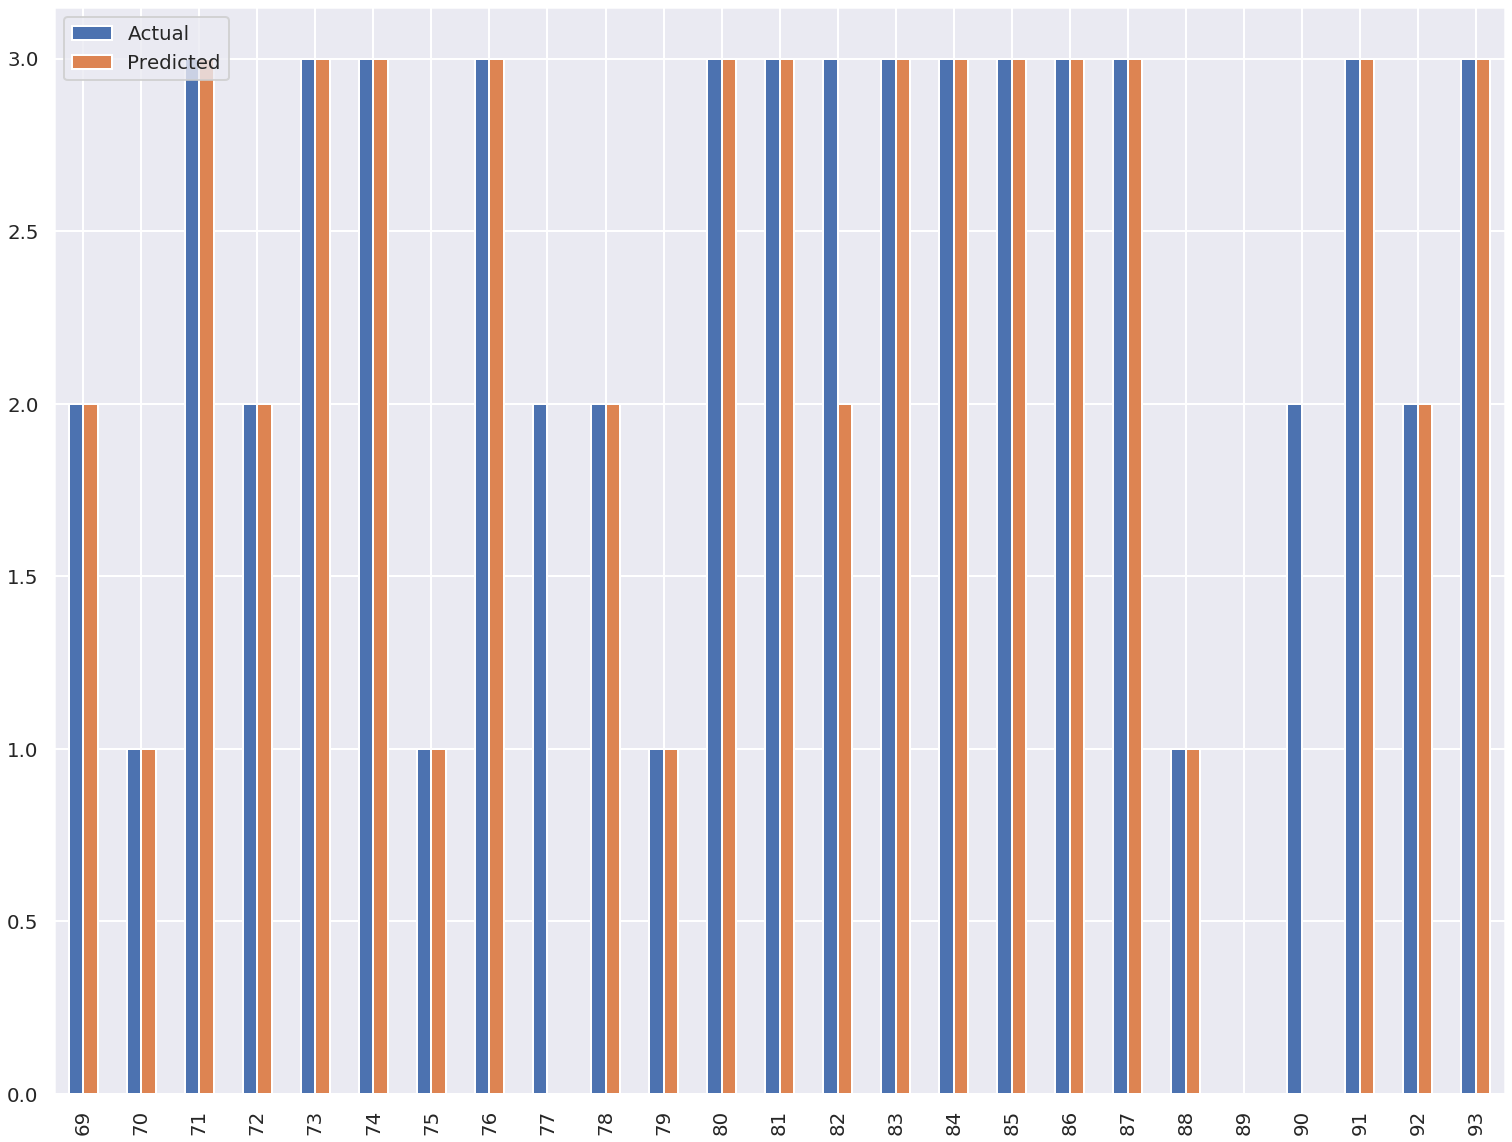

In [303]:
df.plot.bar()
plt.show()

In [305]:
print('Model accuracy: {:.2f}%'.format(model.score(balancing_X, balancing_y)*100))

Model accuracy: 97.97%
